# Visualizing using graphviz

In [1]:
#%reset
import graphviz
import pickle
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import pydotplus
from six import StringIO 
from IPython.display import Image
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
import os
from Functions import add_labels_to_subplots
hfont = {'fontname':'Helvetica'}


# Optimized CDC Classifiers

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_auroc_0.8100_pruned.sav'

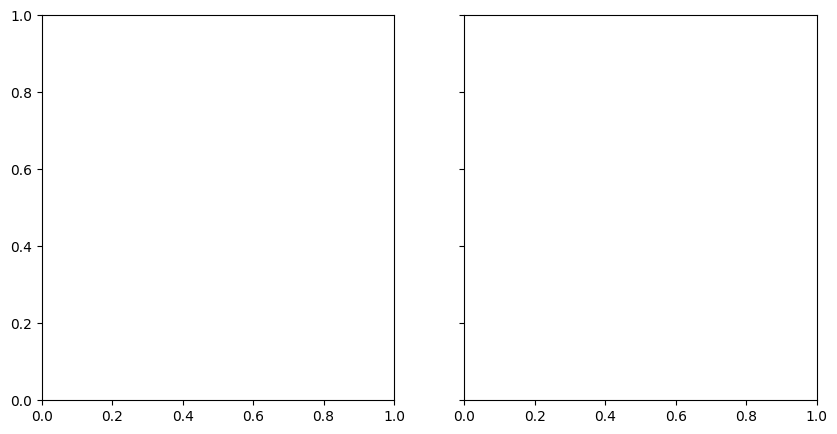

In [2]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
CDC_exact = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_auroc_0.8100_pruned.sav", 'rb'))
CDC_exact_enhanced = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_optimized_exact_enhanced_auroc_0.8209_pruned.sav", 'rb'))
feature_names_CDC=['Cases', 'Admits','Percent Covid']
feature_names_enhanced=['Cases', 'Admits','Percent Covid', 'Exceed threshold']

axs.ravel()
auROC = [0.810, 0.821]
plot_tree(CDC_exact, ax=axs[0], feature_names=['Cases', 'Admits','Percent Covid'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(CDC_exact_enhanced, ax=axs[1], feature_names=['Cases', 'Admits','Percent Covid', 'Beds over 15 per 100k'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [ ]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [CDC_exact, CDC_exact_enhanced]
feature_names_options = [feature_names_CDC,feature_names_enhanced]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"10.5,3.5!"')
    graph.write_png(f'graph_{classifiers.index(clf)}.png')  



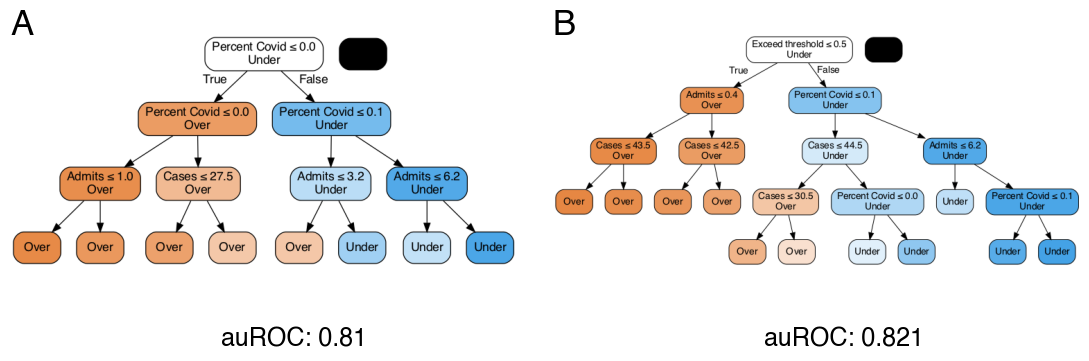

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(11, 5.5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')

axs.ravel()
for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].axis('off')
add_labels_to_subplots(axs, hfont, 1.1, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/2.5, ax.get_ylim()[1] * -900, f'auROC: {auROC[i]}', fontsize=18, **hfont)
plt.tight_layout()

plot_name = '/Users/rem76/Documents/COVID_projections/COVID_forecasting/Graphs/CDC_classifiers_all.png'
plt.savefig(plot_name, dpi = 500)


# Expanding models - exact

In [ ]:
new_directory = '/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/'
os.chdir(new_directory)

In [ ]:
# loading these doesn't work? 
Best_model = "/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/Full_model_best_exact.sav"
Worst_model = "/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/Full_model_worst_exact.sav"
clf_full_period_best = pickle.load(open(Best_model, 'rb'))
clf_full_period_worst = pickle.load(open(Worst_model, 'rb'))

In [ ]:
time_period = 'exact'

feature_names=['COVID-19 cases','\u0394 COVID-19 cases', 'COVID-19 deaths', '\u0394 COVID-19 deaths', 'COVID-19  admissions', '\u0394 COVID-19 admissions', 'COVID-19 ICU beds', '\u0394 COVID-19 ICU beds',  'COVID-19 hospital beds', '\u0394 COVID-19 hospital beds', 'Perc. of beds with \nCOVID-19 patients', '\u0394 Perc. beds with \nCOVID-19 patients', '> 15 per 100,000 COVID-19 \npatients in hospital beds']

clf_full_period_best = pickle.load(open(Best_model, 'rb'))
clf_full_period_worst = pickle.load(open(Worst_model, 'rb'))

def simplify_labels_graphviz(graph):
    for node in graph.get_node_list():
        if node.get_attributes().get("label") is None:
            continue
        else:
            split_label = node.get_attributes().get("label").split("<br/>")
            if len(split_label) == 4:
                split_label[3] = split_label[3].split("=")[1].strip()

                del split_label[1]  # number of samples
                del split_label[1]  # split of sample
            elif len(split_label) == 3:  # for a terminating node, no rule is provided
                split_label[2] = split_label[2].split("=")[1].strip()

                del split_label[0]  # number of samples
                del split_label[0]  # split of samples
                split_label[0] = "<" + split_label[0]
            node.set("label", "<br/>".join(split_label))
def enhance_graph(graph):
    graph.set_dpi(400)  # Set DPI for higher resolution (adjust as needed)
    graph.set_margin(.1)  # Adjust margins to make the graph layout tighter
    graph.set_rankdir('TB')  # Set the direction of the graph (e.g., top to bottom)

# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_full_period_best,clf_full_period_worst]


for clf in classifiers:
    dot_data = StringIO()
    tree.export_graphviz(clf, 
                         out_file=dot_data, 
                         class_names=['Over', 'Under'], # the target names.
                         feature_names=feature_names, # the feature names.
                         filled=True, # Whether to fill in the boxes with colors.
                         rounded=True, # Whether to round the corners of the boxes.
                         special_characters=True, 
                         proportion=False,
                         precision=0, 
                         impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.write_png(f'/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/graph_{classifiers.index(clf)}.png')

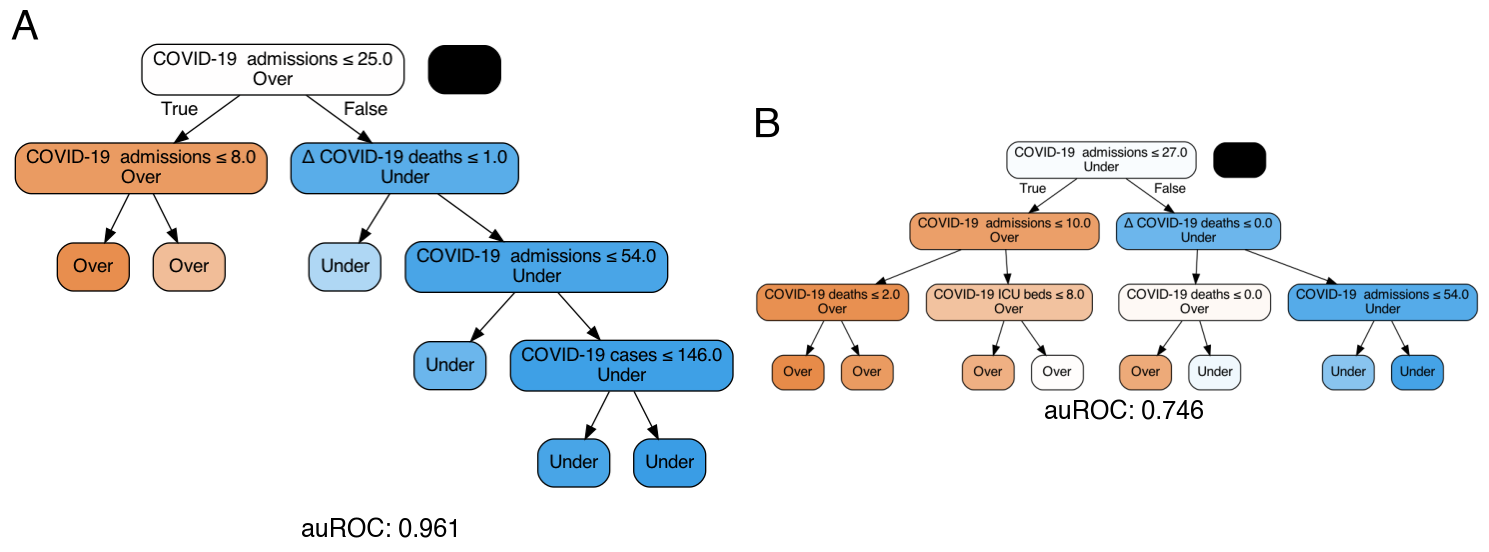

In [ ]:

# Create subplots without border
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5), facecolor='white', edgecolor='white', 
                        gridspec_kw={'width_ratios': [1, 1], 'width_ratios': [1, 1]})
auROC = [0.961, 0.746]
axs.ravel()
for ax in axs:
    ax.axis('off')
    ax.set_frame_on(False)  # Remove the border from the subplot

for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].text(axs[i].get_xlim()[1] / 2.5, axs[i].get_ylim()[0] * 1.10, f'auROC: {auROC[i]}', fontsize=18, **hfont)

# Add labels to subplots
add_labels_to_subplots(axs, hfont, 1.1, fontsize=30)

# Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = '/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/Best_Worst_Classifiers_exact.png'
plt.savefig(plot_name, dpi=200)

# Expanding models - final week 

In [16]:
new_directory = '/Users/rem76/Documents/COVID_projections/Exact_analysis_smaller_hyperparameters/Expanding_models_15_per_100k/Full_model_no_cases_no_deaths'
os.chdir(new_directory)
# loading these doesn't work? 
final_week = "Full_model_smaller_hyperparametersexact_117.sav"
clf_full_final_week = pickle.load(open(final_week, 'rb'))


In [17]:
time_period = 'exact'

feature_names=['COVID-19  admissions', '\u0394 COVID-19 admissions', 'COVID-19 ICU beds', '\u0394 COVID-19 ICU beds',  'COVID-19 hospital beds', '\u0394 COVID-19 hospital beds', 'Perc. of beds with \nCOVID-19 patients', '\u0394 Perc. beds with \nCOVID-19 patients', '> 15 per 100,000 COVID-19 \npatients in hospital beds']


def simplify_labels_graphviz(graph):
    for node in graph.get_node_list():
        if node.get_attributes().get("label") is None:
            continue
        else:
            split_label = node.get_attributes().get("label").split("<br/>")
            if len(split_label) == 4:
                split_label[3] = split_label[3].split("=")[1].strip()

                del split_label[1]  # number of samples
                del split_label[1]  # split of sample
            elif len(split_label) == 3:  # for a terminating node, no rule is provided
                split_label[2] = split_label[2].split("=")[1].strip()

                del split_label[0]  # number of samples
                del split_label[0]  # split of samples
                split_label[0] = "<" + split_label[0]
            node.set("label", "<br/>".join(split_label))
def enhance_graph(graph):
    graph.set_dpi(400)  # Set DPI for higher resolution (adjust as needed)
    graph.set_margin(.1)  # Adjust margins to make the graph layout tighter
    graph.set_rankdir('TB')  # Set the direction of the graph (e.g., top to bottom)

# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [clf_full_final_week]


for clf in classifiers:
    dot_data = StringIO()
    tree.export_graphviz(clf, 
                         out_file=dot_data, 
                         class_names=['Over', 'Under'], # the target names.
                         feature_names=feature_names, # the feature names.
                         filled=True, # Whether to fill in the boxes with colors.
                         rounded=True, # Whether to round the corners of the boxes.
                         special_characters=True, 
                         proportion=False,
                         precision=0, 
                         impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.write_png(f'/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/graph_{classifiers.index(clf)}.png')

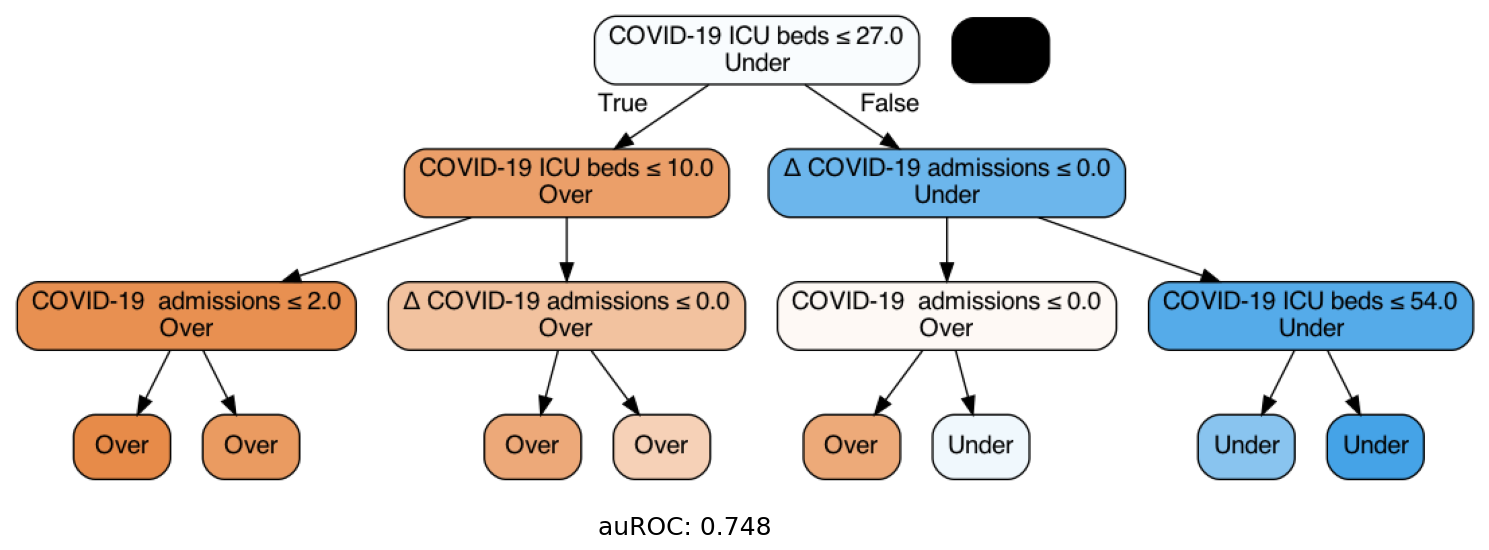

In [21]:
from PIL import Image
import numpy as np
auROC = [0.748]
# Create subplots without border
fig, axs = plt.subplots(1, len(dot_datas), figsize=(15*len(dot_datas), 7.5), facecolor='white', edgecolor='white',
                        gridspec_kw={'width_ratios': [1]*len(dot_datas)})
if len(dot_datas) == 1:
    axs = [axs]  # Ensure axs is a list even when there's only one subplot

for ax in np.ravel(axs):
    ax.axis('off')
    ax.set_frame_on(False)  # Remove the border from the subplot

for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'/Users/rem76/Documents/COVID_projections/Exact_analysis/Full_model_exact/graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].text(axs[i].get_xlim()[1] / 2.5, axs[i].get_ylim()[0] * 1.10, f'auROC: {auROC[i]}', fontsize=18)

# Add labels to subplots
def add_labels_to_subplots(axs, y, fontsize):
    for i, ax in enumerate(np.ravel(axs)):
        ax.text(0.5, y, f'Subplot {i+1}', fontsize=fontsize, transform=ax.transAxes, ha='center')

#add_labels_to_subplots(axs, 1.1, fontsize=30)

# Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = 'Final_week_exact_no_cases_no_deaths.png'
plt.savefig(plot_name, dpi=200)
plt.show()

# CDC Classifier period

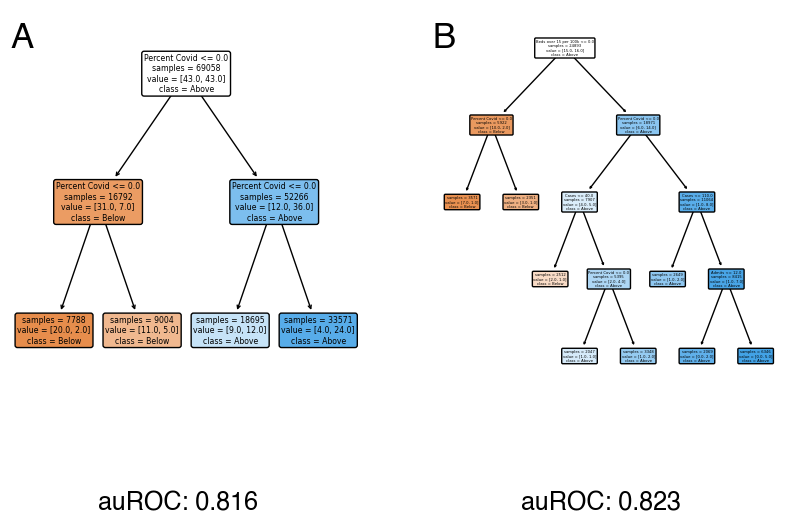

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k', sharex = 'all', sharey = 'all')
CDC_exact_A = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_classifier_auroc_0.8155_CDC_period.sav", 'rb'))
CDC_exact_B = pickle.load(open("/Users/rem76/Documents/COVID_projections/COVID_forecasting/CDC_classifier_auroc_0.8234_CDC_period_B.sav", 'rb'))
feature_names_CDC=['Cases', 'Admits','Percent Covid']
feature_names_enhanced=['Cases', 'Admits','Percent Covid', 'Exceed threshold']

axs.ravel()
auROC = [0.816, 0.823]
plot_tree(CDC_exact_A, ax=axs[0], feature_names=['Cases', 'Admits','Percent Covid'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
plot_tree(CDC_exact_B, ax=axs[1], feature_names=['Cases', 'Admits','Percent Covid', 'Beds over 15 per 100k'], class_names=['Below', 'Above'], filled=True, impurity=False, proportion=False, rounded=True, precision=0)
#plt.tight_layout()
add_labels_to_subplots(axs, hfont, 0.9, fontsize = 25)
for i, ax in enumerate(axs):
        ax.text(ax.get_xlim()[1]/4, ax.get_ylim()[1] * -0.300, f'auROC: {auROC[i]}', fontsize=18, **hfont)


In [ ]:
# Create StringIO objects to store dot data
dot_datas = []

# Your classifiers
classifiers = [CDC_exact_A, CDC_exact_B]
feature_names_options = [feature_names_CDC,feature_names_enhanced]


for i, clf in enumerate(classifiers):
    dot_data = StringIO()
    export_graphviz(clf, 
                    out_file=dot_data, 
                    class_names=['Over', 'Under'], # the target names.
                    feature_names=feature_names_options[i], # the feature names.
                    filled=True, # Whether to fill in the boxes with colors.
                    rounded=True, # Whether to round the corners of the boxes.
                    special_characters=True, 
                    proportion=False,
                    precision=1, 
                    impurity=False)
    dot_datas.append(dot_data.getvalue())
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    simplify_labels_graphviz(graph)
    graph.set_size('"10.5,3.5!"')
    graph.write_png(f'/Users/rem76/Documents/COVID_projections/COVID_forecasting/graph_{classifiers.index(clf)}.png')  


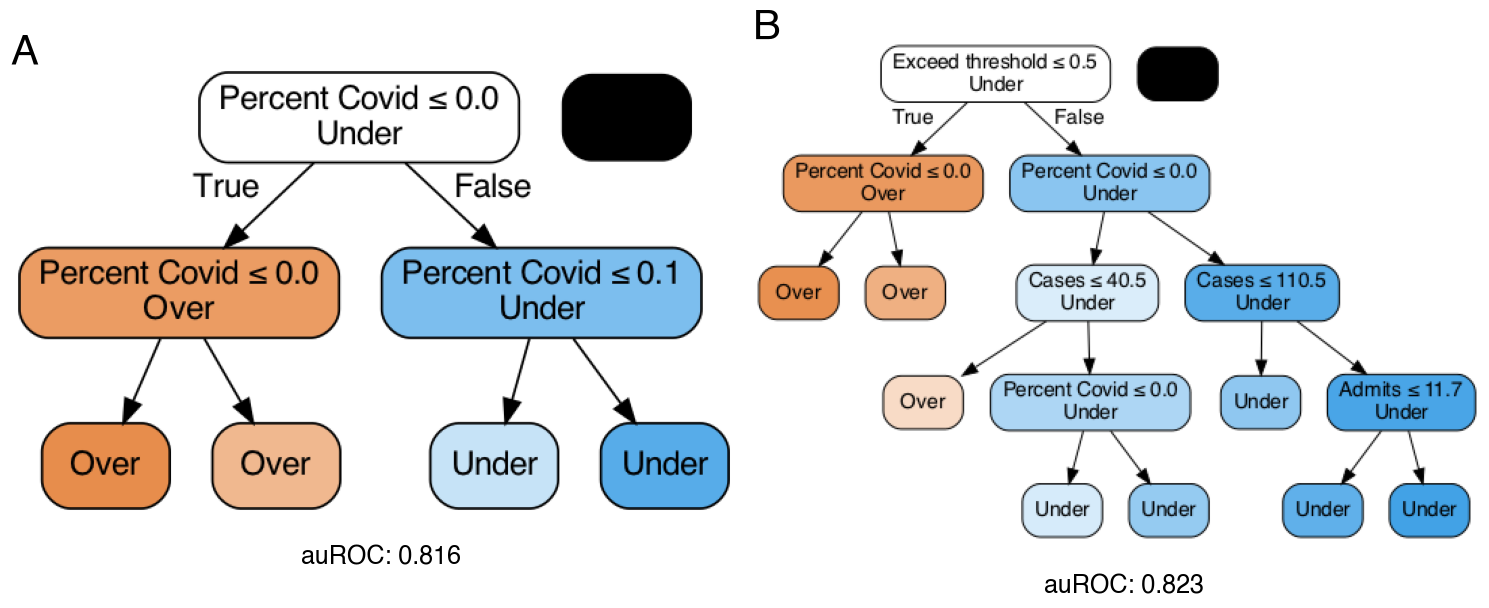

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Create subplots without border
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5), facecolor='white', edgecolor='white', 
                        gridspec_kw={'width_ratios': [1, 1], 'width_ratios': [1, 1]})
auROC = [0.816, 0.823]
axs.ravel()
for ax in axs:
    ax.axis('off')
    ax.set_frame_on(False)  # Remove the border from the subplot

for i, dot_data in enumerate(dot_datas):
    # Load the saved image for debugging
    img = Image.open(f'/Users/rem76/Documents/COVID_projections/COVID_forecasting/graph_{i}.png')
    axs[i].imshow(np.array(img))
    axs[i].text(axs[i].get_xlim()[1] / 2.5, axs[i].get_ylim()[0] * 1.10, f'auROC: {auROC[i]}', fontsize=18, **hfont)

# Add labels to subplots
add_labels_to_subplots(axs, hfont, 1.1, fontsize=30)

# Adjust gaps between subplots
plt.subplots_adjust(wspace=0.6)
plt.tight_layout()
plot_name = 'CDC_period_classifier_A_B.png'
plt.savefig(plot_name, dpi=200)